In [7]:
#read   numerai training data
import pandas as pd
import numpy as np
train=pd.read_csv('/media/machine_learning/A80C461E0C45E7C01/all/numerai_datasets/numerai_training_data.csv')


Tournament data shape : (136573, 22)


In [134]:
tr=pd.read_csv('/media/machine_learning/A80C461E0C45E7C01/all/numerai_datasets/numerai_training_data.csv')

In [14]:
#retrieve  and   drop   target  random vector
y=train['target']
train=train.drop(['target'],axis=1)
print('Train data shape :', train.shape)

Tournament data shape : (136573, 21)


In [15]:
# read  numerai tournament data and drop the id
test=pd.read_csv('/media/machine_learning/A80C461E0C45E7C01/all/numerai_datasets/numerai_tournament_data.csv')
 

id=test['t_id']
test=test.drop(['t_id'],axis=1)
print('Tournament data shape :', test.shape)


Tournament data shape : (13514, 21)


In [16]:
#make   data sets  as numeric  
tempTrain=train
tempTest=test
trainvec=np.array(train)
testvec=np.array(test)
y=np.array(y)

In [10]:
###############################Do  rowbind of train and test####################################################
"""this because   train  is  not   dense in train set  """

'this because   train  is  not   dense in train set  '

In [32]:
data=np.concatenate((trainvec,testvec))
print(data.shape)

(150087, 21)


In [33]:
############################Discretize  data in  order to do kinetic stuff#########################################

In [34]:
data=np.round(data*10)
data

array([[  0.,   8.,   8., ...,   1.,   1.,   0.],
       [  4.,   6.,   8., ...,   3.,   4.,   4.],
       [  3.,   8.,   6., ...,   3.,   4.,   3.],
       ..., 
       [  7.,   3.,   0., ...,   7.,   9.,  10.],
       [  5.,   5.,   9., ...,   2.,   5.,   0.],
       [  1.,   3.,   5., ...,   3.,   3.,   2.]])

In [35]:
#convert data  from  float to int
data=data.astype(int)
data

array([[ 0,  8,  8, ...,  1,  1,  0],
       [ 4,  6,  8, ...,  3,  4,  4],
       [ 3,  8,  6, ...,  3,  4,  3],
       ..., 
       [ 7,  3,  0, ...,  7,  9, 10],
       [ 5,  5,  9, ...,  2,  5,  0],
       [ 1,  3,  5, ...,  3,  3,  2]])

In [37]:
################################Compute kinetic  correlation matrix#########################################
#https://alexandrudaia.quora.com/Onicescu-correlation-coefficient-Python-version-my-approach

In [39]:
import numpy as np
import pandas   as pd
 
import  numpy as np
def  kin_energy(random_vec):
    """return    kinetic  energy  of   random vector represented   of   (1,) dimmensional  array"""
    freq=np.unique(random_vec,return_counts=True)
    prob=freq[1]/random_vec.shape[0]
    energy=np.sum(prob**2)
    return  energy
def  ic(vector1,vector2):
    """return  information  coefficient   IC  for  2  random  variables 
    -defined as   dot product of   probabilities  corresponding to  each class
    
    """
    a=vector1
    b=vector2
    # get the probs  in order  to    do     dot product with  them 
    prob1=np.unique(a,return_counts=True)[1]/a.shape[0]
    prob2=np.unique(b,return_counts=True)[1]/b.shape[0]
    p1=list(prob1)
    p2=list(prob2)
    diff=len(p1)-len(p2)
    if diff>0:
        for elem in range(diff):
            p2.append(0)
    if diff<0:
        for  elem in range((diff*-1)):
            p1.append(0)
    ic=np.dot(np.array(p1),np.array(p2))
    return ic
    
 
def  o(vector1,vector2):
    """return onicescu   information   correlation   based on kinetic energy """
    i_c=ic(vector1,vector2)
    o=i_c/np.sqrt(kin_energy(vector1)*kin_energy(vector2))
    return o

In [43]:
rows=data.shape[1]
rows

21

In [52]:
matrix= np.zeros((rows,rows))

In [53]:
 
for i in range(rows):
    for j in  range(i, rows):
        cor=o(data[:,i],data[:,j])
  
        matrix[i,j]=cor
        matrix[j,i]=cor
         

In [147]:
corr_matrix=matrix
matrix=pd.DataFrame(matrix)
 

In [55]:
 

matrix.columns=train.columns



In [57]:
import  string
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

In [58]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

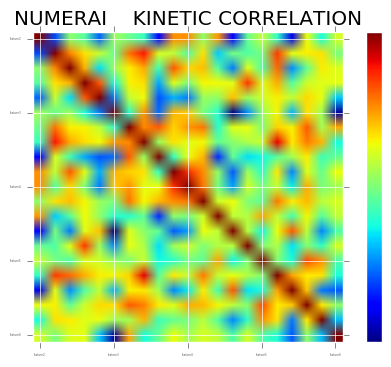

In [81]:

names=train.columns
def correlation_matrix(matrix,names):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet',10)
    cax = ax1.imshow(matrix)
    ax1.grid(True)
    plt.title('NUMERAI    KINETIC CORRELATION')
    labels= names
    ax1.set_xticklabels(labels,fontsize=2)
    ax1.set_yticklabels(labels,fontsize=2)
 
    cbar = fig.colorbar(cax, ticks=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16,.17,.18])
    plt.show()

correlation_matrix(matrix,names)



In [82]:
#########################################Doin  PCA   with   kinetic  correlation matrix #######################3

In [108]:
class kineticPCA(object):
    def __init__(self,kinetic_components):
        self.kinetic_components=kinetic_components
        self.eigenvalues=None
        self.eigenvectors=None
    def fit_transform_Kinetic(self,matrix,data):
        self.eigenvalues,self.eigenvectors=np.linalg.eig(matrix)
        ordered=np.argsort(self.eigenvalues)
        components=self.eigenvectors[:,ordered[-self.kinetic_components:]]
        return data.dot(components)
        
        
        

In [116]:
kPCA=kineticPCA(2)

In [117]:
new_features=kPCA.fit_transform_Kinetic(corr_matrix,data)

In [118]:
new_features.shape

(150087, 2)

In [120]:
train['kineticPCA1']=new_features[0:136573,0]
train['kineticPCA2']=new_features[0:136573,1]

In [122]:
test['kineticPCA1']=new_features[136573:,0]
test['kineticPCA2']=new_features[136573:,1]

In [135]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import np_utils
 
y_train=np_utils.to_categorical(tr['target'])
y_train

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [139]:
def create_model():
    model=Sequential()
    model.add(Dense(15,input_dim=23,init='normal',activation='sigmoid'))
    model.add(Dense(10, init='normal', activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

In [142]:
model.fit(np.array(train),y_train,batch_size=250,nb_epoch=20,verbose=3)

Epoch 1/20


/home/machine_learning/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [143]:
pred=model.predict_proba(np.array(test))

 8576/13514 [==================>...........] - ETA: 0s

/home/machine_learning/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


13120/13514 [============================>.] - ETA: 0s

In [144]:
sub = pd.read_csv('/media/machine_learning/A80C461E0C45E7C01/all/numerai_datasets/example_predictions.csv')
sub['probability']=pred[:,1]

In [145]:
sub.to_csv("/home/machine_learning/Downloads/subKineticA.csv", index=False)

In [149]:
np.corrcoef(np.array(new_features[:,0]),np.array(new_features[:,1]))

array([[ 1.00000000+0.j, -0.20057501+0.j],
       [-0.20057501+0.j,  1.00000000+0.j]])